# Getting Started
## Get a Scopus API key

Using Scopus is not free. You need to have a license or institutional access to use it. Got to http://dev.elsevier.com/myapikey.html to register and get a key. `scopus` expects this key to be in a variable called MY_API_KEY defined in ~/.scopus/my_scopus.py. I recommend you create it like this.

In [ ]:
import os
os.makedirs('~/.scopus')

Note running this next cell will overwrite your file if it already exists!

In [ ]:
%%file ~/.scopus/my_scopus.py
MY_API_KEY = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

## Examples of usage
### scopus_api

This module implements the http://dev.elsevier.com/retrieval.html API. The main entry point is the ScopusAbstract class, which takes a Scopus EID and an optional refresh boolean value. Retrieving these results is not fast, so we cache them to speed up subsequent uses of the code. Sometimes you may want new results, e.g. to get citation counts, and then you set refresh=True.

In [2]:
from scopus.scopus_api import ScopusAbstract

ab = ScopusAbstract("2-s2.0-84930616647", refresh=True)
print(ab)

[[https://www.scopus.com/inward/record.uri?partnerID=HzOxMe3b&scp=84930616647&origin=inward][2-s2.0-84930616647]]  John R. Kitchin, Examples of effective data sharing in scientific publishing, ACS Catalysis, 5(6), p. 3894-3899, (2015). http://dx.doi.org/10.1021/acscatal.5b00538, https://www.scopus.com/inward/record.uri?partnerID=HzOxMe3b&scp=84930616647&origin=inward, cited 3 times (Scopus).
  Affiliations:
   id:60027950 Carnegie Mellon University


You can print the abstract in a variety of formats, including LaTeX, bibtex, HTML, and RIS. Here is an example. For bibtex entries, you get a uuid for the key.

In [3]:
from scopus.scopus_api import ScopusAbstract

ab = ScopusAbstract("2-s2.0-84930616647")
print(ab.bibtex)
print(ab.ris)

@article{0df2d8da-154e-11e7-92dc-48d705e201bd,
  author = {John R. Kitchin},
  title = {Examples of effective data sharing in scientific publishing},
  journal = {ACS Catalysis},
  year = {2015},
  volume = {5},
  number = {6},
  pages = {3894-3899},
  doi = {10.1021/acscatal.5b00538}
}


TY  - JOUR
AU  - Kitchin J.R.
TI  - Examples of effective data sharing in scientific publishing
JO  - ACS Catalysis
VL  - 5
IS  - 6
DA  - 2015-06-05
SP  - 3894-3899
PY  - 2015
DO  - 10.1021/acscatal.5b00538
UR  - http://dx.doi.org/10.1021/acscatal.5b00538
ER  - 




### Interacting with the abstract
The abstract has a number of properties on it.

In [4]:
from scopus.scopus_api import ScopusAbstract

ab = ScopusAbstract("2-s2.0-84930616647", view="FULL")
print([x for x in dir(ab) if not x.startswith('_')])

['affiliations', 'aggregationType', 'article_number', 'authors', 'authors_xml', 'bibtex', 'cite_link', 'citedby_count', 'coredata', 'coverDate', 'creator', 'description', 'doi', 'eid', 'endingPage', 'get_corresponding_author_info', 'html', 'identifier', 'issn', 'issueIdentifier', 'latex', 'nauthors', 'pageRange', 'publicationName', 'publisher', 'refcount', 'references', 'ris', 'scopus_link', 'self_link', 'source_id', 'srctype', 'startingPage', 'title', 'url', 'volume', 'xml']


Some of these are objects themselves. Here we consider the authors, which is a list of scopus.scopus_api.ScopusAuthor objects. These objects have quite a bit of information on them.



In [6]:
from scopus.scopus_api import ScopusAbstract

ab = ScopusAbstract("2-s2.0-84930662492")
for au in ab.authors:
    print(au)

print([x for x in dir(au) if '__' not in x])

1. John D. Michael scopusid:56673592900 affiliation_id:60027950
2. Ethan L. Demeter scopusid:55328415000 affiliation_id:60027950
3. Steven M. Illes scopusid:56674328100 affiliation_id:60027950
4. Qingqi Fan scopusid:56673468200 affiliation_id:60027950
5. Jacob R. Boes scopusid:56522803500 affiliation_id:60027950
6. John R. Kitchin scopusid:7004212771 affiliation_id:60027950
['affiliations', 'auid', 'author', 'author_url', 'given_name', 'indexed_name', 'initials', 'scopusid', 'seq', 'surname']


Another item of potential interest is the journal. Here we can access information about the journal impact factors of an article.



In [7]:
from scopus.scopus_api import ScopusAbstract, ScopusJournal

ab = ScopusAbstract("2-s2.0-84930616647")

print(ScopusJournal(ab.issn))

ACS Catalysis http://www.scopus.com/source/sourceInfo.url?sourceId=19700188320
    Homepage: 
    SJR:  3.277 (2014)
    SNIP: 1.997 (2014)
    IPP:  8.458 (2014)



### scopus_search

This is a class to enable you to perform a query and then retrieve the records of the query for analysis. The EIDs for the search are cached so subsequent analysis is quicker. This class mostly just provides a list of EIDs which you can use for the ScopusAbstract class.

In [8]:
from scopus.scopus_search import ScopusSearch

s = ScopusSearch('FIRSTAUTH ( kitchin  j.r. )', refresh=True)
print(s.org_summary)

1. [[https://www.scopus.com/inward/record.uri?partnerID=HzOxMe3b&scp=84971324241&origin=inward][2-s2.0-84971324241]]  J.R. Kitchin and A.J. Gellman, High-throughput methods using composition and structure spread libraries, AIChE Journal, 62(11), p. 3826-3835, (2016). http://dx.doi.org/10.1002/aic.15294, https://www.scopus.com/inward/record.uri?partnerID=HzOxMe3b&scp=84971324241&origin=inward, cited 0 times (Scopus).
  Affiliations:
   id:60027950 Carnegie Mellon University
2. [[https://www.scopus.com/inward/record.uri?partnerID=HzOxMe3b&scp=84930349644&origin=inward][2-s2.0-84930349644]]  John R. Kitchin, Data sharing in Surface Science, Surface Science, 647, p. 103-107, (2016). http://dx.doi.org/10.1016/j.susc.2015.05.007, https://www.scopus.com/inward/record.uri?partnerID=HzOxMe3b&scp=84930349644&origin=inward, cited 0 times (Scopus).
  Affiliations:
   id:60027950 Carnegie Mellon University
3. [[https://www.scopus.com/inward/record.uri?partnerID=HzOxMe3b&scp=84930616647&origin=inwar

### scopus_report
This module provides a function to generate a report on a scopus search. It outputs text in org-format. It summarizes the results in a variety of ways, such as the number of hits, which journals they are published in, who the coauthors are, how many times the articles have been published, etc…

In [9]:
from scopus.scopus_search import ScopusSearch
from scopus.scopus_reports import report

s = ScopusSearch('FIRSTAUTH ( kitchin  j.r. )')
report_title='Kitchin - first author' #what ever you want
report(s, report_title)

*** Report for Kitchin - first author

#+attr_latex: :placement [H] :center nil
#+caption: Types of documents found for Kitchin - first author.
| Document type | count |
|-
| Journal | 10 |
| Conference Proceeding | 1 |



10 articles (1305 citations) found by 10 authors

#+attr_latex: :placement [H] :center nil
#+caption: Author publication counts for Kitchin - first author.
| name | count | categories |
|-
| [[scopusid:7004212771][Kitchin J.R.]] | 10 | Chemical Engineering (all) (24), Physical and Theoretical Chemistry (21), Chemistry (all) (20) |
| [[scopusid:7501891385][Chen J.G.]] | 5 | Physical and Theoretical Chemistry (164), Catalysis (139), Condensed Matter Physics (78) |
| [[scopusid:7005171428][Barteau M.A.]] | 5 | Physical and Theoretical Chemistry (166), Catalysis (109), Condensed Matter Physics (79) |
| [[scopusid:7007042214][Norskov J.K.]] | 3 | Physical and Theoretical Chemistry (213), Catalysis (173), Condensed Matter Physics (154) |
| [[scopusid:7401797491][Khan N.A.]

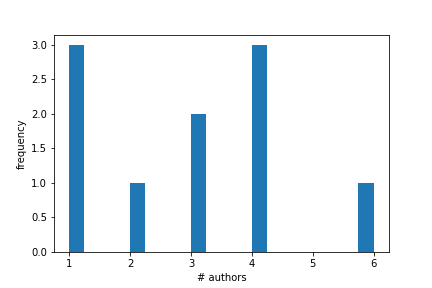

In [10]:
from IPython.display import Image
Image(report_title+"-nauthors-per-publication.png")

### scopus_author

This class differs from the author class described in scopus_api. This class is to interact with the entire author record in Scopus, using the author’s scopus id. The ScopusAuthor object can access many bits of data about an author, including the number of papers, h-index, author impact factor, etc…

In [11]:
from scopus.scopus_author import ScopusAuthor

au = ScopusAuthor(7004212771)
print([x for x in dir(au) if '__' not in x])

['_affiliation_history', '_author_id', '_citedby_url', '_coauthor_url', '_current_affiliation', '_date_created', '_firstname', '_hindex', '_lastname', '_name', '_ncited_by', '_ncoauthors', '_ndocuments', '_orcid', '_scopus_url', 'affiliation_history', 'author_id', 'author_impact_factor', 'categories', 'citedby_url', 'coauthor_url', 'current_affiliation', 'date_created', 'firstname', 'get_abstracts', 'get_coauthors', 'get_document_eids', 'get_document_summary', 'hindex', 'lastname', 'level', 'n_first_author_papers', 'n_journal_articles', 'n_last_author_papers', 'n_yearly_publications', 'name', 'ncitations', 'ncited_by', 'ncoauthors', 'ndocuments', 'orcid', 'scopus_url']


In [1]:
from scopus.scopus_author import ScopusAuthor

au = ScopusAuthor(7004212771)
print([a.name for a in au.get_coauthors()])

['Jens Kehlet Nørskov', 'Bruce C. Gates', 'Matthias Scheffler', 'Dionisios G. Vlachos', 'R. J. Gorte', 'Theodore E. Madey', 'Inkyu Song', 'Israel E. Wachs', 'David S. Sholl', 'Marc T M Koper', 'Christopher W. Jones', 'Jingguang Chen', 'Ulrich Stimming', 'Anatoly I. Frenkel', 'Mark A. Barteau', 'Andrew J. Gellman', 'William D. Jones', 'Karsten Reuter', 'Morris Morris Bullock', 'Hannes Jónsson', 'Terrence J. Collins', 'Henry W. Pennline', 'Jan Rossmeisl', 'Edward S. Rubin', 'Thomas Francisco Jaramillo', 'Susannah Scott', 'Paul A. Salvador', 'E. Charles H Sykes', 'David R. Luebke', 'David C M Miller', 'Thomas Bligaard', 'Evan Jacob Granite', 'John R. Kitchin', 'Newell R. Washburn', 'Bryan D. Morreale', 'Krishnan V. Damodaran', 'Venkatasubramanian K. Viswanathan', 'Lars Lindqvist', 'José Ignacio Martínez', 'Lisa Mauck Weiland', 'Kirk R. Gerdes', 'James B. Miller', 'Federico Calle-Vallejo', 'Mc Mahan L Gray', 'Edward M. Sabolsky', 'Heine Anton Hansen', 'Ashish B. Mhadeshwar', 'Jeongwoo Han'

You can generate a report about an author just by printing a ScopusAuthor object. The output of this is long, so we do not show it here.

In [ ]:
from scopus.scopus_author import ScopusAuthor

au = ScopusAuthor(7004212771)
print(au)